In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from langdetect import detect
from nltk.tokenize import sent_tokenize, word_tokenize 

from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from nltk.stem.snowball import SnowballStemmer

In [2]:
import unidecode
def convert_unidecode(x):
    return unidecode.unidecode(x)

In [3]:
# remove ponctuation
def remove_punct1(x):
    p = ['!', '(', ')', '-', '[', ']', '{', '}', ';', ':', "'", '"', '\\', ',', '<', '>', '.', '/', '?', '@', '#', '$', '%', '^', '&', '*', '_', '~']
    return ' '.join([string for string in x.split(' ') if string not in p])

In [4]:
# remove ponctuation
def remove_punct2(x):
    import re
    return re.sub(r'[^\w]|[^\w] ', ' ', x)

In [5]:
# Define stop words to clean text (job description)
stopwords_en = set(stopwords.words('english'))

stopwords_pt = set(stopwords.words('portuguese'))

stopwords_es = set(stopwords.words('spanish'))

In [6]:
def remove_stop_words(x):
    return ' '.join([word.lower() for word in x.split() \
                   if word.lower() not in (stopwords_en)]) if detect(x)=='en'\
    else ' '.join([word.lower() for word in x.split() \
                   if word.lower() not in (stopwords_pt)]) if detect(x)=='pt'\
    else ' '.join([word.lower() for word in x.split() \
                   if word.lower() not in (stopwords_es)])

In [7]:
def remove_stop_words1(x):
    stop_words_concat = list(stopwords_en)+list(stopwords_es)+list(stopwords_pt)
    return ' '.join([word.lower() for word in x.split() \
                   if word.lower() not in stop_words_concat])

In [8]:
def stem_snowball(x):
    if detect(x) == 'pt':
        stemmer = SnowballStemmer('portuguese')
        tokens = nltk.word_tokenize(x)
        return [stemmer.stem(token) for token in tokens]
    if detect(x) == 'en':
        stemmer = SnowballStemmer('english')
        tokens = nltk.word_tokenize(x)
        return [stemmer.stem(token) for token in tokens]
    if detect(x) == 'es':
        stemmer = SnowballStemmer('spanish')
        tokens = nltk.word_tokenize(x)
        return [stemmer.stem(token) for token in tokens]

In [9]:
def bigrams(x):
    #Tokens = nltk.word_tokenize(x)
    output = list(nltk.bigrams(x))
    return output

In [10]:
def trigram(x):
    #Tokens = nltk.word_tokenize(x)
    output = list(nltk.trigrams(x))
    return output

In [11]:
def token(x):
    output = nltk.word_tokenize(x)
    return output

In [12]:
df = pd.read_csv('/home/inrx/Ironhack/TA/job-search/linkedin_search.csv')
print (df.shape)
df.head()

(91, 11)


,title,company,company-link,post-date,applications,location,skills,role-description,job-poster,job-poster-profile,link
0,Data Analyst - Product Insights,Farfetch,https://www.linkedin.com/company/farfetch.com/...,Posted 6 days ago,Be among the first 25 applicants,"Porto Area, Portugal",Match\nData Visualization\nMatch\nSQL\nMatch\n...,THE ROLE\nYou'll do analysis and tests to infl...,Rafaela Carvalho 2nd,https://www.linkedin.com/in/rafaelaascarvalho/,https://www.linkedin.com/jobs/view/1526861678/
1,Data Analyst (m/f),Linde,https://www.linkedin.com/company/linde/life/,Posted 6 days ago,93 applicants,"Porto e Região, Portugal",NaN,Mission\nAnalyse data in order to influence pr...,NaN,NaN,https://www.linkedin.com/jobs/view/1538168934/
2,Business Analyst,Axians,https://www.linkedin.com/company/axians/life/,Posted 3 days ago,Be among the first 25 applicants,"Lisbon, PT",NaN,A Axians é a marca do grupo Vinci Energies ded...,NaN,NaN,https://www.linkedin.com/jobs/view/1585144716/
3,Data Analyst,KWAN,https://www.linkedin.com/company/kwan-love-res...,Posted 1 week ago,Be among the first 25 applicants,"Lisbon, PT",NaN,We are currently looking forward to hire an en...,NaN,NaN,https://www.linkedin.com/jobs/view/1579616329/
4,Junior Analyst - Data Analytics - Reading,EY,https://www.linkedin.com/company/ernstandyoung...,Posted 2 weeks ago,Be among the first 25 applicants,"Reading, GB",NaN,"Junior Analyst – Assurance, Data & Analytics -...",NaN,NaN,https://www.linkedin.com/jobs/view/1506528365/


In [13]:
df = df.drop_duplicates(keep='last')
df = df.reset_index(drop=True)

In [14]:
df = df.replace(to_replace=r'\n', value=' ', regex=True)

In [15]:
df['role-description'] = df['role-description'].apply(remove_punct1)
df['role-description'] = df['role-description'].apply(remove_punct2)

In [17]:
df['role-description'] = df['role-description'].apply(lambda x: x.lower())

In [21]:
# Clean the text according remove the stopwords according to the language of the job post
df['role_description1'] = df['role-description'].apply(remove_stop_words)

# Clean the text according remove the stopwords regardless the language of the job post
df['role_description1'] = df['role_description1'].apply(remove_stop_words1)

In [19]:
df['role-description'] = df['role-description'].apply(convert_unidecode)

In [23]:
df['role_description1'] = df['role_description1'].apply(stem_snowball)

In [25]:
df['role_des_bigrams'] = df['role_description1'].apply(bigrams)

In [26]:
df['role_des_trigrams'] = df['role_description1'].apply(trigram)

In [27]:
trigrams = {tup:lst.count(tup) for lst in df['role_des_trigrams'] for tup in lst}

trigrams = {k: v for k, v in trigrams.items() if v > 2}

trigrams_sorted = sorted(trigrams.items(), key=lambda kv: kv[1], reverse=True)

In [28]:
bigrams = {tup:lst.count(tup) for lst in df['role_des_bigrams'] for tup in lst}

bigrams = {k: v for k, v in bigrams.items() if v > 2}

bigrams_sorted = sorted(bigrams.items(), key=lambda kv: kv[1], reverse=True)

In [29]:
tokens = {tup:lst.count(tup) for lst in df['role_description1'] for tup in lst}

tokens = {k: v for k, v in tokens.items() if v > 5}

tokens_sorted = sorted(tokens.items(), key=lambda kv: kv[1], reverse=True)

In [30]:
bigrams_sorted

[(('master', 'data'), 9),
 (('00', 'h'), 8),
 (('oper', 'research'), 7),
 (('gobiern', 'dat'), 7),
 (('research', 'analyst'), 6),
 (('emea', 'soc'), 6),
 (('control', 'manag'), 6),
 (('deb', 'ten'), 6),
 (('credit', 'risk'), 6),
 (('r', 'solut'), 5),
 (('portfolio', 'manag'), 5),
 (('project', 'manag'), 5),
 (('complianc', 'risk'), 5),
 (('risk', 'control'), 5),
 (('finanz', 'personal'), 5),
 (('secur', 'incid'), 5),
 (('risk', 'tool'), 5),
 (('client', 'servic'), 4),
 (('drive', 'healthcar'), 4),
 (('healthcar', 'forward'), 4),
 (('dat', 'scienc'), 4),
 (('event', 'monitor'), 4),
 (('potenti', 'secur'), 4),
 (('use', 'servic'), 4),
 (('technolog', 'driven'), 4),
 (('bi', 'data'), 3),
 (('data', 'mine'), 3),
 (('3', 'anos'), 3),
 (('softwar', 'develop'), 3),
 (('data', 'scientist'), 3),
 (('data', 'analyst'), 3),
 (('market', 'analyt'), 3),
 (('center', 'excel'), 3),
 (('english', 'proactiv'), 3),
 (('oper', 'problem'), 3),
 (('data', 'sourc'), 3),
 (('data', 'wareh'), 3),
 (('high', '

In [31]:
trigrams_sorted

[(('oper', 'research', 'analyst'), 6),
 (('complianc', 'risk', 'control'), 5),
 (('risk', 'control', 'manag'), 5),
 (('credit', 'risk', 'tool'), 5),
 (('drive', 'healthcar', 'forward'), 4),
 (('potenti', 'secur', 'incid'), 4),
 (('data', 'analysi', 'abl'), 3),
 (('analysi', 'abl', 'gather'), 3),
 (('abl', 'gather', 'inform'), 3),
 (('gather', 'inform', 'key'), 3),
 (('inform', 'key', 'risk'), 3),
 (('key', 'risk', 'identif'), 3),
 (('risk', 'identif', 'develop'), 3),
 (('identif', 'develop', 'effect'), 3),
 (('develop', 'effect', 'control'), 3),
 (('effect', 'control', 'techniqu'), 3),
 (('control', 'techniqu', 'product'), 3),
 (('techniqu', 'product', 'process'), 3),
 (('product', 'process', 'regul'), 3),
 (('process', 'regul', 'relat'), 3),
 (('regul', 'relat', 'retail'), 3),
 (('relat', 'retail', 'wholesal'), 3),
 (('retail', 'wholesal', 'bank'), 3),
 (('team', 'play', 'capabl'), 3),
 (('play', 'capabl', 'work'), 3),
 (('capabl', 'work', 'intern'), 3),
 (('intern', 'team', 'also'), 

In [32]:
tokens_sorted

[('busi', 15),
 ('data', 14),
 ('criteo', 13),
 ('complianc', 12),
 ('iqvia', 11),
 ('healthcar', 10),
 ('nexthink', 10),
 ('gobiern', 9),
 ('brambl', 9),
 ('bank', 9),
 ('fever', 9),
 ('product', 8),
 ('mcafe', 8),
 ('h', 8),
 ('support', 7),
 ('technic', 7),
 ('soc', 7),
 ('credit', 7),
 ('fashion', 6),
 ('experi', 6),
 ('good', 6),
 ('peopl', 6),
 ('high', 6),
 ('ingenieri', 6),
 ('ing', 6),
 ('kelist', 6),
 ('incid', 6)]

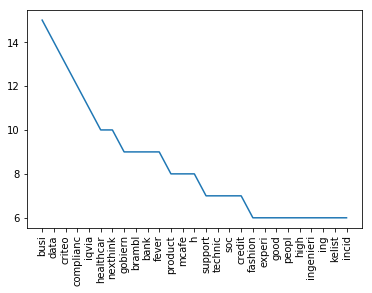

In [35]:
tokens_x =list(zip(*tokens_sorted))[0]
tokens_y =list(zip(*tokens_sorted))[1]

import matplotlib.pyplot as plt
#%matplotlib notebook
plt.plot(tokens_x, tokens_y);
plt.xticks(rotation=90)
plt.show()
#plt.ylim(5,15);